# Week 5

Phew. You've handed in the assignment. But there's not resting now. We're just hitting out grove, so let's get going!! Much to get through today.

## The informal intro

\[informal intro goes here\]

## Feedback on the questionnaire

Last week many of you also took the time to fill out a questionnaire. I go over your answers in the video below.

\[feedback on questionnaire video goes here\]


## The plan for today

We continue exploring data and learning about dataviz. The lecture today has 4 parts.
* In part 1, there is more lecturing.
* In part 2, we talk about exploring data with two variables - we read a bit more.
* In part 3, it's a short one about logarithmic plots.
* And finally, in part 4, we have fun with linear regression.

Ok. Now it's time to get started.


## Part 1: More lecturing on dataviz

So now we start learning more about the theory of visualization, digging into data encodings and representations.

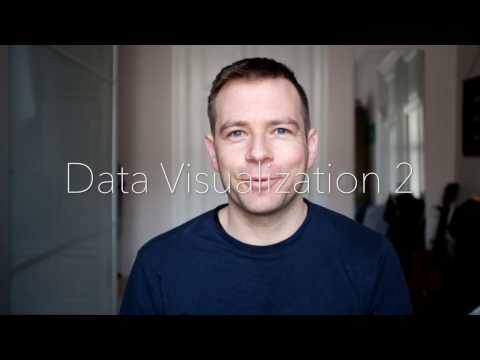

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("zE6Nr8trdrw",width=800, height=450)

> Excercise: Some questions for the video
>
> * Mention 10 examples of ways we can encode data
> * Are all encoding created equally? Why not?
> * Explain in your own words: What is the problem with pie-charts?
> * Mention three encodings that are difficult for the human eye to parse? Can you find an example of a visualization online that uses one of those three?
> * What is a "Choropleth"? What does the ancient Greek root of that word "χώρος" mean?

## Part 2: Exploratory data visualzation, two variables  

I told you how I love the Data Analysis with Open Source Tools book. This time, we'll read Chapter 3, which is about visualizing data with two variables. 

*Reading*: DAOST Chapter 3 up to *Graphical Analysis and Presentation Graphics* on page 68 in the PDF. **You will have to go and get it on DTU Learn due to the copyright stuff**.

And now a few exercises to reflect on the text:

*Exercises:* DAOST chapter 3

 > * Looking at Fig 3-1, Janert writes "the data itself shows clearly that the amount of random noise in the data is small". What do you think his argument is?
> * Can you think of a real-world example of a multivariate relationship like the one in Fig 3-3 (lower right panel)?
> * What are the two methods Janert metions for smoothing noisy data? Can you think of other ones?
> * What is problematic about using straight lines to fit the data in Fig 3-5? (Something similar is actually the topic of a *Nature* article from 2004 get it [here](https://github.com/suneman/socialdataanalysis2018/blob/master/files/regrunners.pdf). And an extra [link](http://www2.imm.dtu.dk/pubdb/views/edoc_download.php/3366/pdf/imm3366.pdf) on this topic for the students who know Danish).
> * What are residuals? Why is it a good idea to plot the residuals of your fit?
> * Explain in your own words the point of the smooth tube in figure 3-7.
> * What kind of relationships will a semi-log plot help you discover?
> * What kind of functions will loglog plots help you see?
> * What the h#ll is banking and what part of our visual system does it use to help us see patterns? What are potential problems with banking?
> * I think figure 3-14 makes an important point about linear fits that is rarely made. What is it? 
> * Summarize the discussion of Graphical Analysis and Presentation Graphics on pp. 68-69 in your own words.

## Part 3: Logarithmic plots

Ok. Let's briefly talk about logarithms and logarithimic plots (if you take my networks class in the fall semester you'll se lots of loglog plots since they're important for understanding a key property of networks).

*Exercise*: Logarithms and plots

> * First, we'll simply create a version of [this plot](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/categories.png) from Lecture 1, where you display the $y$-axis on log-scale.
> * Let's also try a loglog plot. Inspired by [this article](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0183110) I would expect that especially theft could be characterized by a power law distribution also in san francisco. Let's see if I'm right. 
>   - Step 1: Divide San Francisco into a grid roughly $100m \times 100m$. You can, for example use numpy to do this, I would call `np.histogram2d`, and searching the internet, it seems that there are also [ways to do this in pandas](https://stackoverflow.com/questions/39254704/pandas-group-bins-of-data-per-longitude-latitude). The earth isn't flat,so lat lon aren't really squares, but if setting up a true grid of distances seems like too much work, it's OK to just use fractions of lat/lon as bin-edges [even though those aren't completely square](https://gis.stackexchange.com/questions/173926/whats-wrong-in-using-latitude-and-longitude-as-x-and-y-on-a-cartesian-space). 
>   - Step 2: Count the number of thefts occurring within each grid-square (use all data for all time).
>   - Step 3: Tally the counts. Count the number of squares with $k=0$ thefts. We call this $N(0)$. Next, count the number of grids with one crime to get $N(k=1)$. Keep going like this all the way up to $k=C_{max}$, where $C_{max}$ is the highest count of crimes you find in any grid space. 
>     * *Extra tip*: If you want all the details on binning for loglog axes, you can check out [Lecture 2, exercise 3](https://nbviewer.jupyter.org/github/SocialComplexityLab/socialgraphs2020/blob/master/lectures/Week2.ipynb?flush_cache=true) in my social graphs course.
>   - Step 4: Plot the distribution of $k+1$ vs $N(k)$ on linear axes.
>   - Step 5: Plot the distribution of $k+1$ vs $N(k)$ on loglog axes.
>   - Step 6: Answer the question: Was Sune correct in assuming that there is a power-law distribution of theft?

## Part 4: Linear regression

So now it's time for fun with standard linear regression. We'll get into that by asking the following question. 

> *Which pair of focus crimes have the the most similar temporal pattern across the week? (And which pair is most dissimilar).*

Below I list the focus-crimes for your convenience

In [2]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

One way to answer this question is to plot the activity for all pairs of crimetypes as scatter plot per pair. One crime type on each axis, and where each point in the scatter corresponds to an hour of the week, and the number of crimes of crime-type 1 is on the $x$-axis and the number of crimes of crime-type 2 is on the $y$-axis. (So there will be 168 points in each scatterplot.)

If we look at 14 focus crimes that results in
$$\frac{14\times13}{2}=91$$

pairwise comparisons. So we can display them all in a $7$ by $13$ matrix of plots. You can use matplotlib's `subplot` to organize those plots. With $7$ across and $13$ down, you should be able to squeeze them all onto a single [a4](https://en.wikipedia.org/wiki/ISO_216#A_series) page.

*Exercise*:
> Create the 91 scatterplots.
> * Make sure to label each one with the two crime-types you're comparing so we can easily inspect visually.
> * Make sure that that you squeeze the subplots closely together so each plot can be as big as possible. 
> * Just inspecting this matrix, which crime-types look correlated and which one look like they're very different?

Next it's time for the linear regression. Janert writes about this on page 63-66.

There is a closed-form solution for linear regression. If you want to find the best straight line $y = ax + b$ fit to a set of $N$ points $\{(x_1,y_1), (x_2,y_2), \ldots (x_N,y_N)\}$, the value of $b$ is

$$
\tag{1}
b = \langle y \rangle - a \langle x \rangle,
$$

where $\langle x \rangle = (1/N)\sum_i x_i$ is the mean value of the $x_i$ and $\langle y \rangle = (1/N)\sum_i x_i$ is the mean value of the $y_i$. 

And the value for the slope $a$ is 

$$
\tag{2}
a = \frac{\sum_{i=1}^N \left( x_iy_i \right) - N \langle x\rangle\langle y\rangle }{\sum_{i=1}^N\left( x_i^2 \right) - N\langle x\rangle^2}.
$$

Last year, I actually derived this whole thing. I've taken it out of the notebook. But if you'd like to take a look (it's a fun and instructive little exercise), you can find it **[here](https://github.com/suneman/socialdata2021/blob/main/lectures/LinearRegressionDerived.ipynb)**. 

*Exercise*:
> * Using the formulas we derived above (Equation 1 and 2), to calculate slopes for $a$ and $b$ in each case, and add a linear fit to each of the 91 scatterplots. (If you'd like, you can use a built package/function for fitting straight lines to check that everything is working as expected.)
> * (Optional) You can add even more information to this plot by coloring each point according to its hour of the week. So create a gradient going from one color to another, and color each point according to the gradient. (So let's say your two colors are red and blue, then the Sunday, midnight to 1am bin will be red and the following Sunday, 11pm - midnight bin will be blue).

### Goodness of fit as a measure of correlation

But the question we started with was "Which pair of focus crimes have the the most similar temporal pattern across the week?". We haven't really answered that yet. So let's calculate one last thing: $R^2$. You probably also remember this one. 

Basically $R^2$ is a measurea of how good a linear fit is. You can [read about $R^2$ on wikipedia](https://en.wikipedia.org/wiki/Coefficient_of_determination). 

*Exercise:* 
> * Write a little function to calculate $R^2$ alongside each linear fit.
> * **According to your fits and associated measure of $R^2$, which pair of crimes have the most similar temporal pattern. Discuss your finding: Does it make sense? Why?/Why not?**
> * According to your fits and associated measure of $R^2$, which pair of crimes have the most **dis**similar temporal pattern. Discuss your finding: Does it make sense? Why?/Why not?
> * Explain the connection between $R^2$ and the (Pearson correlation coefficient)[https://en.wikipedia.org/wiki/Pearson_correlation_coefficient].
> * And speaking of correlations. In your words, explain the [Spearman correlation](https://en.wikipedia.org/wiki/Spearman's_rank_correlation_coefficient)? How is it different for the Pearson correlation?